# EDA on Movie Character MBTI and Enneagrams 

### Libraries!

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Planning

**Objective:** Practice EDA and Data Visualizations using matplotlib and seaborn, clean/understand dataset  

**Goals:**
- find most common MBTI and enneagram of ALL characters, particular movie series 
- most common MBTI and enneagram pairings

## 2. Data Cleaning

###  But first... reading and understanding data

In [5]:
df = pd.read_csv('mbti.csv/mbti.csv')
df.head()

,stat,mbti,enneagram,role,movie,img_url
0,697 / 162,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe,https://www.personality-database.com/profile_i...
1,668 / 231,ESFP,8w7,Anakin Skywalker,Star Wars,https://www.personality-database.com/profile_i...
2,589 / 243,ESFP,6w7,Ron Weasley,Harry Potter (franchise),https://www.personality-database.com/profile_i...
3,312 / 101,ESFP,7w8,Bellatrix Lestrange,Harry Potter (franchise),https://www.personality-database.com/profile_i...
4,302 / 105,ESFP,7w6,Simba,The Lion King (1994),https://www.personality-database.com/profile_i...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18741 entries, 0 to 18740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stat       18476 non-null  object
 1   mbti       18741 non-null  object
 2   enneagram  12066 non-null  object
 3   role       18741 non-null  object
 4   movie      18741 non-null  object
 5   img_url    18741 non-null  object
dtypes: object(6)
memory usage: 878.6+ KB


### Data Cleaning

#### Dropping Unnecessary Columns

In [35]:
# df.drop('stat', 'img_url')
df.head()

,mbti,enneagram,role,movie
0,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe
1,ESFP,8w7,Anakin Skywalker,Star Wars
2,ESFP,6w7,Ron Weasley,Harry Potter (franchise)
3,ESFP,7w8,Bellatrix Lestrange,Harry Potter (franchise)
4,ESFP,7w6,Simba,The Lion King (1994)


#### Dropping Nan Values

In [27]:
df[df.isna().any(axis=1)].shape

(6675, 4)

In [33]:
df = df.dropna()
df[df.isna().any(axis=1)] # no more null values!

,mbti,enneagram,role,movie


#### Dropping 'XXXX' Values

In [36]:
df['mbti'].unique()

array(['ESFP', 'XXXX', 'ESFJ', 'ESTP', 'ESTJ', 'ENFP', 'ENFJ', 'ENTP',
       'ENTJ', 'ISFP', 'ISFJ', 'ISTP', 'ISTJ', 'INFP', 'INFJ', 'INTP',
       'INTJ'], dtype=object)

In [40]:
df = df[df['mbti'] != 'XXXX']
df['mbti'].unique()

array(['ESFP', 'ESFJ', 'ESTP', 'ESTJ', 'ENFP', 'ENFJ', 'ENTP', 'ENTJ',
       'ISFP', 'ISFJ', 'ISTP', 'ISTJ', 'INFP', 'INFJ', 'INTP', 'INTJ'],
      dtype=object)

## 3. EDA and Observations

### Understanding Distribution 

In [42]:
df.head()

,mbti,enneagram,role,movie
0,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe
1,ESFP,8w7,Anakin Skywalker,Star Wars
2,ESFP,6w7,Ron Weasley,Harry Potter (franchise)
3,ESFP,7w8,Bellatrix Lestrange,Harry Potter (franchise)
4,ESFP,7w6,Simba,The Lion King (1994)


Text(0, 0.5, 'Count')

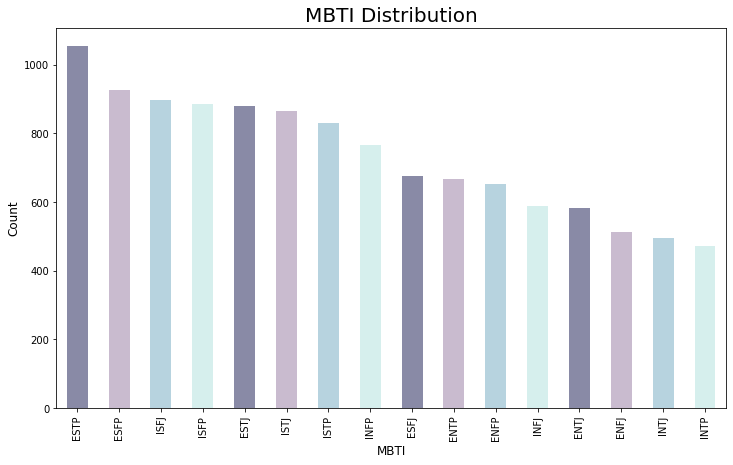

In [80]:
plt.figure(figsize=(12,7))
mbti_counts = df.mbti.value_counts().sort_values(ascending = False).plot.bar(color=['#898AA6', '#C9BBCF','#B7D3DF', '#D6EFED'])
plt.title('MBTI Distribution', fontsize = 20)
plt.xlabel('MBTI', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** It appears that most movie characters are ESTP, ESFP, and ISFJ, but not significantly. 

Text(0, 0.5, 'Count')

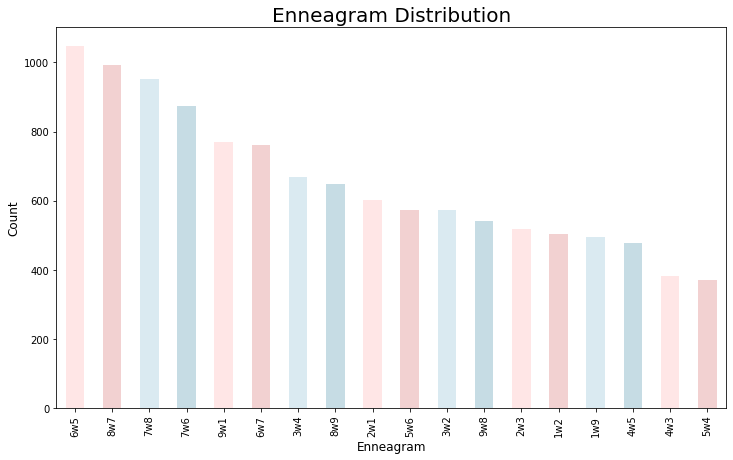

In [82]:
plt.figure(figsize=(12,7))
df.enneagram.value_counts().sort_values(ascending = False).plot.bar(color=['#FFE6E6', '#F2D1D1','#DAEAF1', '#C6DCE4'])
plt.title('Enneagram Distribution', fontsize = 20)
plt.xlabel('Enneagram', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Most characters tend to be an Enneagram type 6 wing 5, 8 wing 7, or 7 wing 8. Similarly to the MBTI distribution, there is not a significant increase between each enneagram, suggesting that all of these movie characters do in fact hold a variety of MBTI and Enneagram personality types.

### MCU Characters: Most Common MBTI and Enneagram

Text(0, 0.5, 'Count')

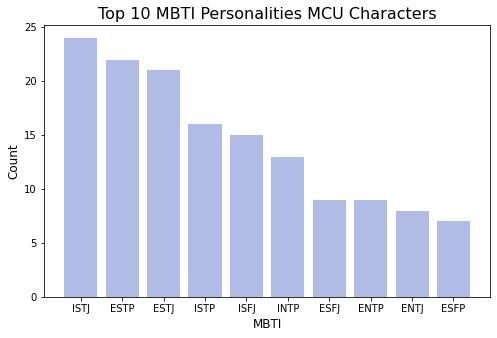

In [125]:
marvel = df[df['movie'] == '   Marvel Cinematic Universe']

#mbti
marvel_mbti = marvel['mbti'].value_counts().head(10).index.tolist()
marvel_mbti_count = marvel['mbti'].value_counts().head(10).values.tolist()

plt.figure(figsize=(8,5))
plt.bar(marvel_mbti, marvel_mbti_count, color='#B1BCE6')

plt.title('Top 10 MBTI Personalities MCU Characters', fontsize = 16)
plt.xlabel('MBTI', fontsize = 12)
plt.ylabel('Count', fontsize = 12)